# League Excitement Analyzer: Customize Your Analysis and Uncover the Unexpected


### You can choose the league, the season, and the betting website to do the analysis

Get ready to dive into the thrilling world of football with our program that lets you choose your league, season, and betting website to analyze and uncover the unexpected matches that measure the excitement and competition of two leagues!

## Import Libraries used

In [99]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [100]:
# Define a dictionary to store the leagues
my_dict = {"E0": "Premier League", "SP1": "La Liga", "D1": "Bundesliga", "F1": "Ligue 1", "I1": "Serie A"}

# Print instructions for the user
print("Please follow the instructions below to generate your plot.")
print("-----------------------------------------------------------")

# Iterate over the leagues in the dictionary and prompt the user to select the leagues
print("Please select two leagues to compare:")
for code, name in leagues.items():
    print(f"Enter '{code}' for {name}")
league1 = input("Enter the code for the first league: ")
league2 = input("Enter the code for the second league: ")
print()

# Prompt the user to select the seasons to compare
print("Please select the seasons to compare:")
print("Seasons should be entered as shown in the example: '0405'")
print("Seasons available: 2008/2009 - 2022/2023")
season1 = input("Enter the season for the first league: ")
season2 = input("Enter the season for the second league: ")
print()

# Prompt the user to select the betting website
print("Please select the betting website to use:")
print("Options: 'B365', 'BW', 'IW', 'WH', 'VC'")
bet = input("Enter the name of the betting website: ")
print()

Please follow the instructions below to generate your plot.
-----------------------------------------------------------
Please select two leagues to compare:
Enter 'E0' for Premier League
Enter 'SP1' for La Liga
Enter 'D1' for Bundesliga
Enter 'F1' for Ligue 1
Enter 'I1' for Serie A
Enter the code for the first league: SP1
Enter the code for the second league: E0

Please select the seasons to compare:
Seasons should be entered as shown in the example: '0405'
Seasons available: 2008/2009 - 2022/2023
Enter the season for the first league: 1920
Enter the season for the second league: 1920

Please select the betting website to use:
Options: 'B365', 'BW', 'IW', 'WH', 'VC'
Enter the name of the betting website: B365



## Import datasets used, the used data set are for both leagues

In [101]:
# pl stands for the first league, sp stands for the second league
sp = pd.read_csv("https://www.football-data.co.uk/mmz4281/"+season1+"/"+league1+".csv")
pl = pd.read_csv("https://www.football-data.co.uk/mmz4281/"+season2+"/"+league2+".csv")

# Data cleaning

For the data cleaning process, we only select columns that will be used in the study.
First we removed the unnecessary betting websites as well as the date of the match, the result of the match in numbers, etc.

In [102]:
sp = sp[['HomeTeam', 'AwayTeam', 'HTR', 'FTR', bet+'A', bet+'H', bet+'D']]
pl = pl[['HomeTeam', 'AwayTeam', 'HTR', 'FTR', bet+'A', bet+'H', bet+'D']]

# A sample to test that the data exists

In [103]:
sp.sample(10)

,HomeTeam,AwayTeam,HTR,FTR,B365A,B365H,B365D
287,Osasuna,Ath Madrid,A,A,1.80,5.00,3.25
137,Villarreal,Celta,D,A,4.33,1.80,3.80
314,Ath Madrid,Alaves,D,H,11.00,1.33,4.75
348,Sociedad,Granada,A,A,5.25,1.72,3.60
235,Sevilla,Espanol,D,D,6.50,1.57,3.80
117,Leganes,Eibar,D,A,3.50,2.25,3.10
247,Getafe,Sevilla,A,A,3.40,2.30,3.10
159,Alaves,Leganes,A,D,3.20,2.40,3.00
152,Levante,Valencia,H,A,2.15,3.20,3.75
141,Sociedad,Eibar,D,H,5.00,1.72,3.75


In [104]:
pl.sample(10)

,HomeTeam,AwayTeam,HTR,FTR,B365A,B365H,B365D
94,West Ham,Sheffield United,H,D,3.50,2.10,3.50
131,Burnley,Crystal Palace,A,A,3.30,2.25,3.25
167,Wolves,Tottenham,A,A,2.25,3.25,3.40
49,Aston Villa,West Ham,D,D,2.60,2.62,3.50
364,Sheffield United,Everton,D,A,3.50,2.20,3.25
215,Wolves,Newcastle,D,D,7.50,1.44,4.50
242,Crystal Palace,Sheffield United,D,A,2.50,3.10,3.10
173,Brighton,Sheffield United,A,A,3.50,2.20,3.25
90,Southampton,Leicester,A,A,2.30,3.10,3.40
141,Burnley,Man City,A,A,1.22,11.00,7.00


## Q1: what is the average HomeTeam win odds for each team in both leagues

## Average HomeTeam win odds for each team in both leagues

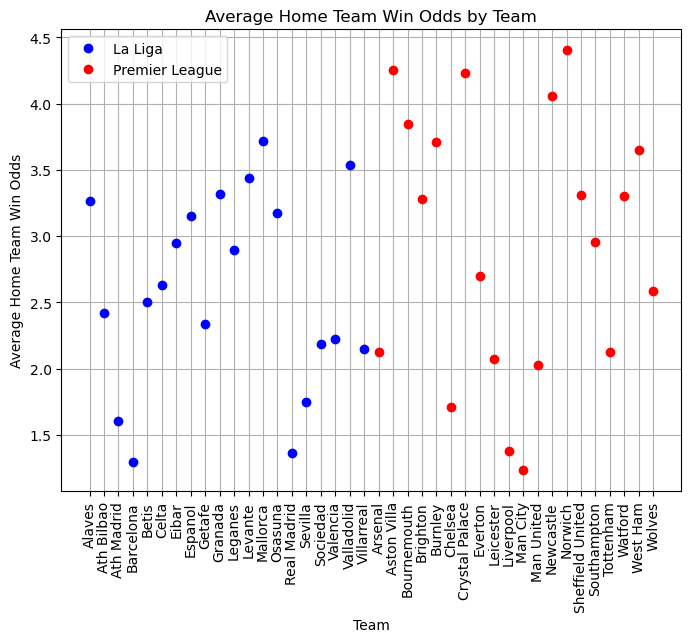

In [105]:
# Calculate the average of the home team win odds for the first and second leagues
x = sp.groupby('HomeTeam')[bet + 'H'].mean()
y = pl.groupby('HomeTeam')[bet + 'H'].mean()

# Create a plot of the home team win odds
plt.figure(figsize=(8, 6))
plt.plot(x, '.', color='blue', markersize=12)
plt.plot(y, '.', color='red', markersize=12)

# Add a legend, title, and axis labels
plt.legend([my_dict[league1], my_dict[league2]])
plt.title('Average Home Team Win Odds by Team')
plt.xlabel('Team')
plt.ylabel('Average Home Team Win Odds')

# Rotate the x-axis tick labels vertically for readability
plt.xticks(rotation='vertical')

#Show the grid
plt.grid(True)

# Show the plot
plt.show()

## Q2: what is the average Draw odds for each team in both leagues

## Average Draw odds for each team in both leagues

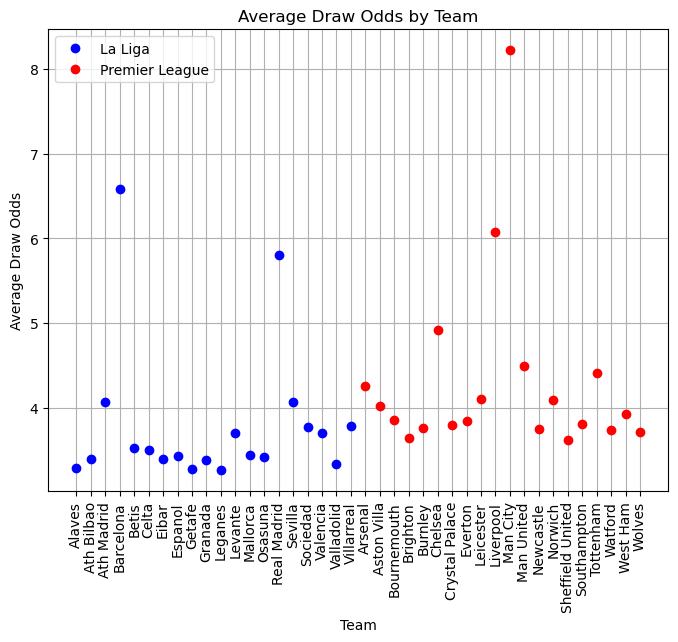

In [106]:
# Calculate the average of the draw odds for the first and second leagues
x = sp.groupby('HomeTeam')[bet + 'D'].mean()
y = pl.groupby('HomeTeam')[bet + 'D'].mean()

# Create a plot of the draw odds
plt.figure(figsize=(8, 6))
plt.plot(x, '.', color='blue', markersize=12)
plt.plot(y, '.', color='red', markersize=12)

# Add a legend, title, and axis labels
plt.legend([my_dict[league1], my_dict[league2]])
plt.title('Average Draw Odds by Team')
plt.xlabel('Team')
plt.ylabel('Average Draw Odds')

# Rotate the x-axis tick labels vertically for readability
plt.xticks(rotation='vertical')

#Show the grid
plt.grid(True)

# Show the plot
plt.show()

## Q3: what is the average AwayTeam win odds for each team in both leagues

## The average AwayTeam win odds for each team in both leagues

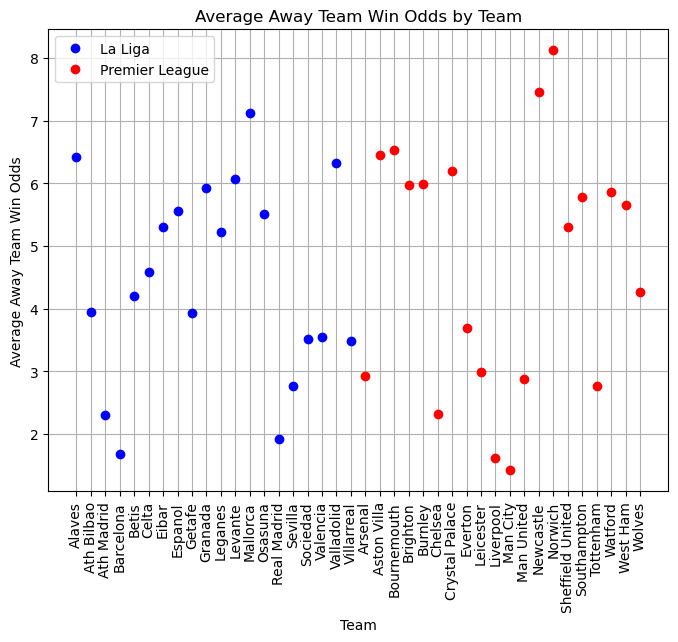

In [107]:
# Calculate the average of the away team win odds for the first and second leagues
x = sp.groupby('AwayTeam')[bet+'A'].mean()
y = pl.groupby('AwayTeam')[bet+'A'].mean()

# Create a plot of the away team win odds
plt.figure(figsize=(8, 6))
plt.plot(x, '.', color='blue', markersize=12)
plt.plot(y, '.', color='red', markersize=12)

# Add a legend, title, and axis labels
plt.legend([my_dict[league1], my_dict[league2]])
plt.title('Average Away Team Win Odds by Team')
plt.xlabel('Team')
plt.ylabel('Average Away Team Win Odds')

# Rotate the x-axis tick labels vertically for readability
plt.xticks(rotation='vertical')

#Show the grid
plt.grid(True)

# Show the plot
plt.show()

# To Uncover the Unpredictable: Two Methods to Calculate Unexpected Matches in Football Analysis

In our analysis, we explore unexpected matches using two methods: the first one compares the winning side on the betting website with the actual winning team, while the second method checks for any changes in the winning team after half-time. Get ready to uncover the most exciting and unpredictable moments in football!

## Q4: Plot graphs that represent the unexpected matches using the first algorithm

## Betting website method

78 unexpected matches in La Liga
86 unexpected matches in Premier League


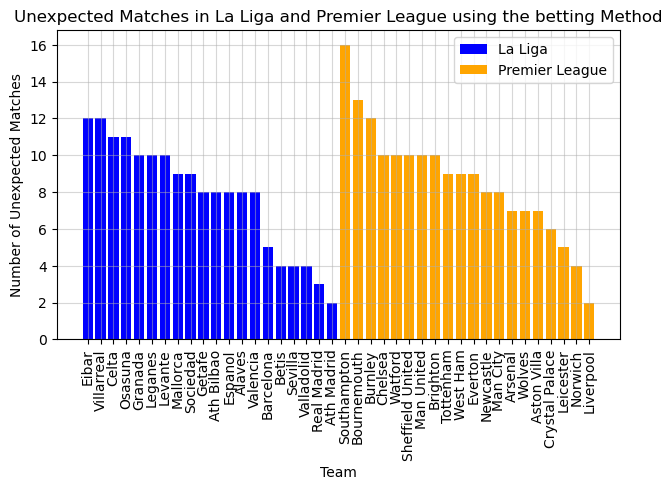

In [108]:
# The function calculates the number of unexpected matches for each team in a given DataFrame using a specified method
# and plots a bar chart to visualize the results
def calculate_unexpected_matches(df, web, color, league_name):

    # Calculate the number of unique teams in the DataFrame
    teams = df['HomeTeam'].nunique()

    # Create a new DataFrame to store the number of unexpected matches for each team
    x = pd.DataFrame({"Team": df['HomeTeam'].unique(), "Unexpected Matches": np.zeros(teams)})

    # Loop through each row of the DataFrame and count the number of unexpected matches for each team
    num_unexpected_matches = 0
    for i in range(len(df)):
        if (df[web+'H'][i] > df[web+'A'][i] and df['FTR'][i] == 'H') or (df[web+'H'][i] < df[web+'A'][i] and df['FTR'][i] == 'A'):
            home_team = df['HomeTeam'][i]
            away_team = df['AwayTeam'][i]
            x.loc[x['Team'] == home_team, 'Unexpected Matches'] += 1
            x.loc[x['Team'] == away_team, 'Unexpected Matches'] += 1
            num_unexpected_matches += 1

    # Sort the values in the new DataFrame by the number of unexpected matches in descending order
    x = x.sort_values(by='Unexpected Matches', ascending=False)

    # Plot a bar chart to visualize the number of unexpected matches for each team
    plt.bar(x['Team'], x['Unexpected Matches'], color=color)
    plt.xlabel("Team")
    plt.ylabel("Number of Unexpected Matches")
    plt.xticks(rotation=90)

    # Adjust the layout of the plot and print the total number of unexpected matches
    plt.tight_layout()
    print(f"{num_unexpected_matches} unexpected matches in {league_name}")


# Call the function for two different DataFrames and display the results in a single plot with a legend
calculate_unexpected_matches(sp, bet, 'blue', my_dict[league1])
calculate_unexpected_matches(pl, bet, 'orange', my_dict[league2])
plt.legend([my_dict[league1], my_dict[league2]], loc='upper right')
plt.title(f"Unexpected Matches in {my_dict[league1]} and {my_dict[league2]} using the betting Method")

#Show the grid
plt.grid(True, alpha = 0.5)

# Display the plot
plt.show()

### Unexpected matches based on betting method

Number of unexpected matches in La Liga : 78


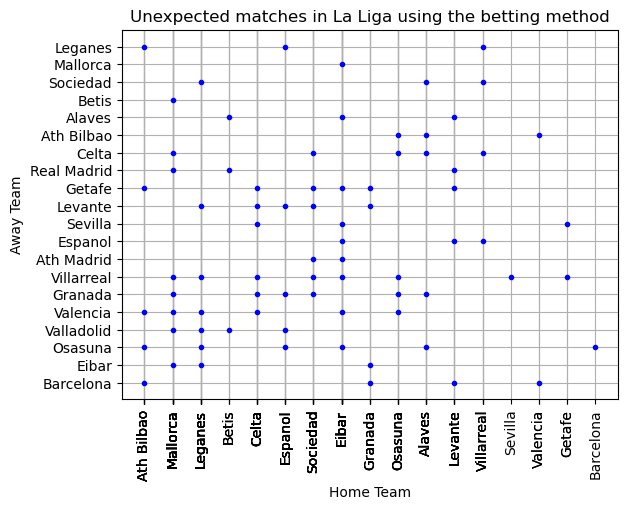

Number of unexpected matches in Premier League : 86


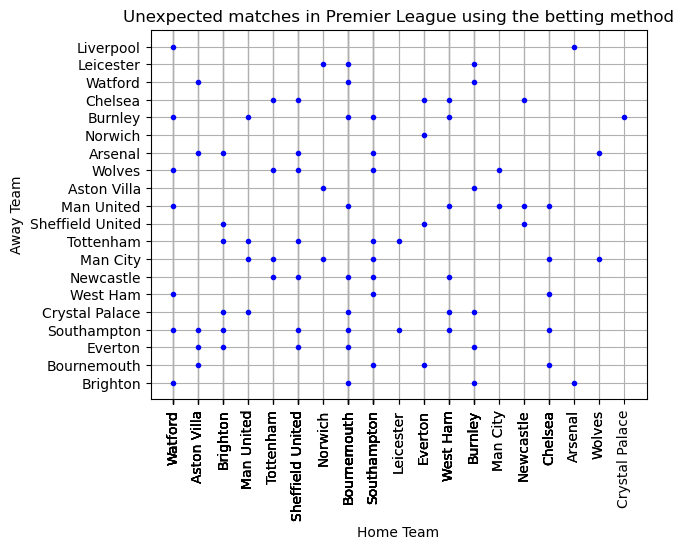

In [109]:
# Define a function to plot unexpected matches
def plot_unexpected_matches(df, league_name):
    # Filter the dataframe to get only unexpected matches
    unexpected_matches = df[(df[bet+'H'] > df[bet+'A']) & (df['FTR'] == 'H') | (df[bet+'H'] < df[bet+'A']) & (df['FTR'] == 'A')]

    # Count the number of unexpected matches
    num_unexpected_matches = len(unexpected_matches)

    # Create a scatter plot of the unexpected matches
    plt.plot(unexpected_matches['HomeTeam'], unexpected_matches['AwayTeam'], '.', color='blue')

    # Set the x-axis labels to the home team names and rotate them vertically
    plt.xticks(unexpected_matches['HomeTeam'], rotation='vertical')
    plt.xlabel('Home Team')
    plt.ylabel('Away Team')

    # Set the plot title
    plt.title(f'Unexpected matches in {league_name} using the betting method')

    # print the number of unexpected matches
    print(f"Number of unexpected matches in {league_name} : {num_unexpected_matches}")

    #Show the grid
    plt.grid(True)

    # Show the plot
    plt.show()

# Call the function for each league
plot_unexpected_matches(sp, my_dict[league1])
plot_unexpected_matches(pl, my_dict[league2])

## Q5: Plot graphs that represent the unexpected matches using the second algorithm

## Half-time method

Number of unexpected matchesin La Liga : 161


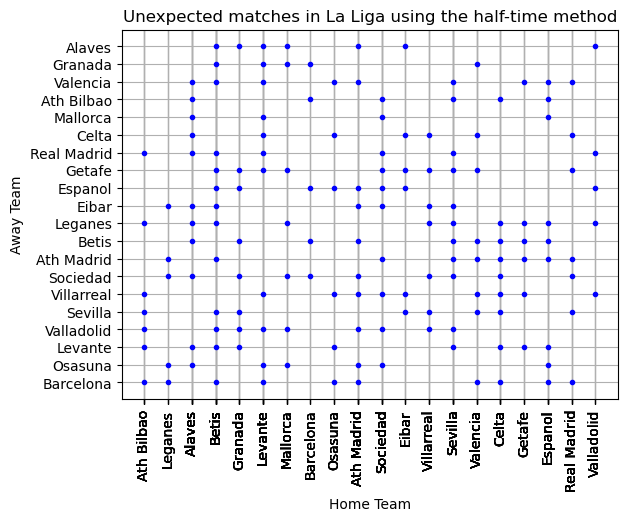

Number of unexpected matchesin Premier League : 154


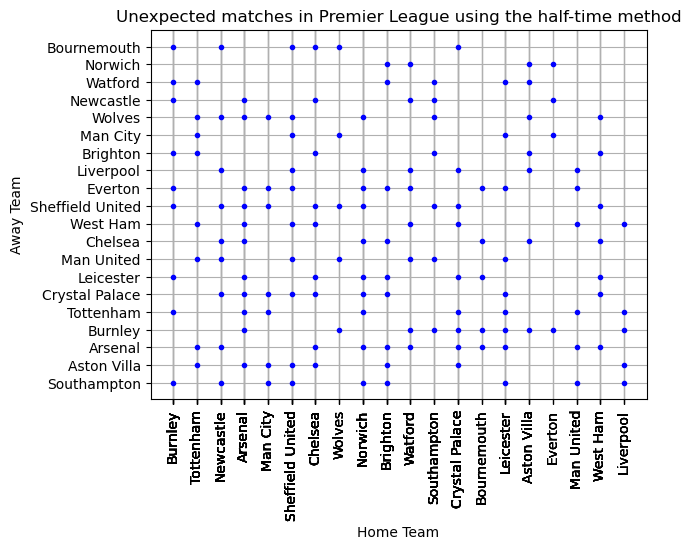

In [110]:
# Define a function to plot unexpected matches
def plot_unexpected_matches(df, league_name):
    # Filter the dataframe to get only unexpected matches
    unexpected_matches = df[df['FTR'] != df['HTR']]

    # Count the number of unexpected matches
    num_unexpected_matches = len(unexpected_matches)

    # Create a scatter plot of the unexpected matches
    plt.plot(unexpected_matches['HomeTeam'], unexpected_matches['AwayTeam'], '.', color='blue')

    # Set the x-axis and y-axis labels
    plt.xlabel('Home Team')
    plt.ylabel('Away Team')

    # Set the x-axis labels to the home team names and rotate them vertically
    plt.xticks(unexpected_matches['HomeTeam'], rotation='vertical')

    # Set the plot title
    plt.title(f'Unexpected matches in {league_name} using the half-time method')

    # print the number of unexpected matches
    print(f"Number of unexpected matchesin {league_name} : {num_unexpected_matches}")

    #Show the grid
    plt.grid(True)


    # Show the plot
    plt.show()

# Call the function for each league
plot_unexpected_matches(sp, my_dict[league1])
plot_unexpected_matches(pl, my_dict[league2])

# Conclusion

In this Exploratory Data Analysis (EDA) project, I developed a program that allowed me to analyze and compare two different leagues at any time. After conducting various tests, I discovered several interesting insights.

For instance, I found that the Premier League and LaLiga had a similar number of unexpected matches for most seasons, using the betting method. However, the Premier League tended to have significantly more unexpected matches using the half-time method. Additionally, since Ronaldo joined LaLiga in the 2009/2010 season, the number of unexpected matches has increased, indicating greater competition and excitement in the league.

To further improve the program, I plan to add more leagues and betting websites in the future.

The datasets used in this project were obtained from  https://www.football-data.co.uk/ , which provides comprehensive statistics on various leagues and betting websites. Overall, this project has allowed me to explore and gain insights into the differences between two leagues, and I look forward to developing it further in the future.